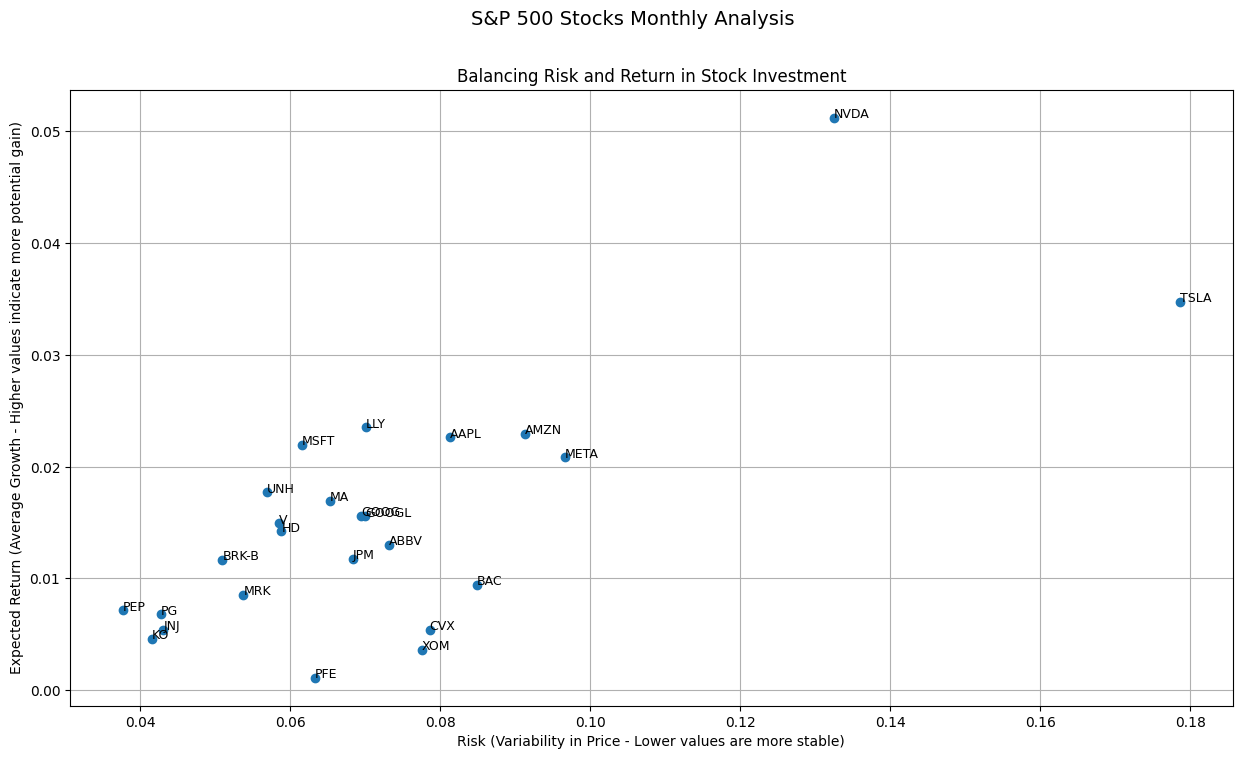

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

stock_path = '../Data Collection & Processing/top25_SP500'
df = pd.DataFrame()
for file in os.listdir(stock_path):
    # Derive the symbol from the filename
    symbol = file.split('.')[0]

    # Load the data
    path = os.path.join(stock_path, file)
    df_stock = pd.read_csv(path)

    # Set the Date as index column
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock = df_stock.set_index('Date')

    # Resample based on months and compute the changes
    resampled = df_stock.resample('BM')
    monthly = resampled.apply(lambda x: x[-1])
    df[symbol] = monthly['Open'].pct_change()

# Drop NaNs
df = df.dropna()

# Make the plot
x = df.std().tolist()
y = df.mean().tolist()
symbols = df.columns

plt.figure(figsize=(15,8))

# Scatterplot and annotation
plt.scatter(x, y)
for index, symbol in enumerate(symbols):
    plt.annotate(symbol, (x[index], y[index]), fontsize=9)

# Add gridlines
plt.grid(True)

# Enhanced Title and Axis Labels
plt.xlabel('Risk (Variability in Price - Lower values are more stable)')
plt.ylabel('Expected Return (Average Growth - Higher values indicate more potential gain)')
plt.title('Balancing Risk and Return in Stock Investment')
plt.suptitle('S&P 500 Stocks Monthly Analysis', fontsize=14)

plt.show()